# NAME: GOWRI SHANKAR S
ORGANISATION: THE SPARK FOUNDATION

# Task:Prediction Using Supervised ML

In [2]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# importing the data
df = pd.read_csv("http://bit.ly/w-data")

In [7]:
# exploring top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:

# exploring bottom 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:

# checking the number of columns and rows in dataset
df.shape

(25, 2)

In [10]:

# checking the types of data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:

# summarizing the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


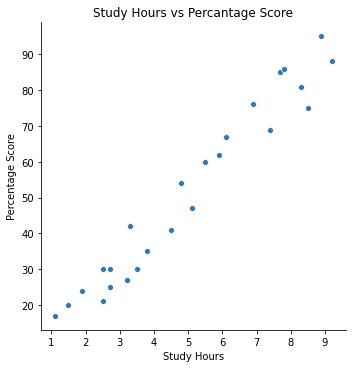

In [12]:
# plotting the data
sns.set_palette("RdBu_r")
sns.relplot(x = 'Hours', y = 'Scores', data = df)
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.title("Study Hours vs Percantage Score")
plt.show()

In [13]:
# checking correlation of columns
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
# attribute
X = df.iloc[:, :-1].values

# target
y = df.iloc[:, 1].values

In [15]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# instantiating the regressor
reg = LinearRegression()

# fitting the data to the model
reg.fit(X_train, y_train)

LinearRegression()

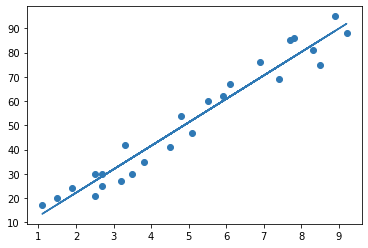

In [17]:
# plotting the regression line
line = reg.coef_ * X + reg.intercept_

# plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [18]:
# predicting score
y_pred = reg.predict(X_test)

In [19]:
# comparing actual vs predicted
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

actual_vs_predicted

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


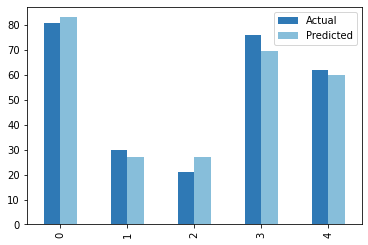

In [20]:
# plotting the actual vs predicted
actual_vs_predicted.plot(kind = 'bar')
plt.show()


In [21]:
# predicting score if a student studies for 9.25 hrs/ day
hour = np.array([9.25]).reshape(-1, 1)
predicted_score = reg.predict(hour)

print(f"If a student studies for 9.25 hrs/ day, predicted score will be {predicted_score[0]}.")

If a student studies for 9.25 hrs/ day, predicted score will be 92.38611528261494.


# Evaluating the model

In [22]:
print("Mean Squared Error: {} \nRoot Mean Squared Error: {} \nMean Absolute Error: {}"
      .format(metrics.mean_squared_error(y_test, y_pred),
              np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              metrics.mean_absolute_error(y_test, y_pred)))

Mean Squared Error: 18.943211722315272 
Root Mean Squared Error: 4.352380006653288 
Mean Absolute Error: 3.9207511902099244
